In [84]:
import numpy as np
import matplotlib.pyplot as plt
from Corrfunc.theory.DD import DD
from sklearn.neighbors import KernelDensity
from scipy.stats import norm
import scipy.optimize as spo

DATA_DIRECTORY = "/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/"

def pow_func(r, A, alpha):
    return A * np.power(r, -alpha)

font = {'family' : 'sans',
        'weight' : 'normal',
        'size'   : 14}

import matplotlib
matplotlib.rc('font', **font)

In [85]:
import numpy as np

# Get all text file paths in the data folder
file_paths = ['/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_034.txt',
 '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_029.txt',
 '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_026.txt',
 '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_024.txt',
 '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_020.txt',
 '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_019.txt',
 '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_018.txt']

# Initialize an empty dictionary to store the arrays for each file
file_arrays = {}

# Read each file and extract the desired columns
for file_path in file_paths:
    x_coordinates = []
    y_coordinates = []
    z_coordinates = []
    accretion_rates = []
    
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            columns = line.split()
            x_coordinates.append(float(columns[2]))  # Fix: Use columns[3] for x coordinate
            y_coordinates.append(float(columns[3]))  # Fix: Use columns[4] for y coordinate
            z_coordinates.append(float(columns[4]))  # Fix: Use columns[5] for z coordinate
            accretion_rates.append(float(columns[8]))
    
    # Store the arrays in the dictionary using the file path as the key
    file_arrays[file_path] = {
        'x_coordinates': np.array(x_coordinates),
        'y_coordinates': np.array(y_coordinates),
        'z_coordinates': np.array(z_coordinates),
        'accretion_rates': np.array(accretion_rates)
    }

# Print the arrays for each file
for file_path, arrays in file_arrays.items():
    print("File:", file_path)
    print("X Coordinates:", arrays['x_coordinates'])
    print("Y Coordinates:", arrays['y_coordinates'])
    print("Z Coordinates:", arrays['z_coordinates'])
    print("Accretion Rates:", arrays['accretion_rates'])
    print()

File: /home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_034.txt
X Coordinates: [64958.36 47851.68 29848.42 ... 94077.15 41319.44 41366.41]
Y Coordinates: [28551.5  85669.85 62413.66 ... 65677.22 61497.12 61047.71]
Z Coordinates: [  86.23714 -103.1571   -49.71245 ...  270.8329  -181.5829  -737.1361 ]
Accretion Rates: [0.00099087 0.00094861 0.00062796 ... 0.00026968 0.00036953 0.00034172]

File: /home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_029.txt
X Coordinates: [61469.64 89272.82 20508.27 ... 35610.27 10024.92 12166.36]
Y Coordinates: [34244.26 74603.05 87456.69 ... 90063.8  72257.88 60024.74]
Z Coordinates: [ 468.3003   462.6008   136.2574  ... -229.5797  -404.6429    66.65427]
Accretion Rates: [3.725515e-09 4.890826e-04 1.993965e-03 ... 2.616124e-04 8.978967e-04
 3.078784e-04]

File: /home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_026.txt
X Coordinates: [93100.8  37024.08 45056.39 ... 44554.91 33862.12 51509.92]
Y Coordin

In [86]:
import numpy as np

max_z = -np.inf
min_z = np.inf

for file_name, file_data in file_arrays.items():
    z_coordinates = file_data['z_coordinates']
    max_z = max(max_z, np.max(z_coordinates))
    min_z = min(min_z, np.min(z_coordinates))

print("Maximum z coordinate:", max_z)
print("Minimum z coordinate:", min_z)

Maximum z coordinate: 2079.844
Minimum z coordinate: -1443.63


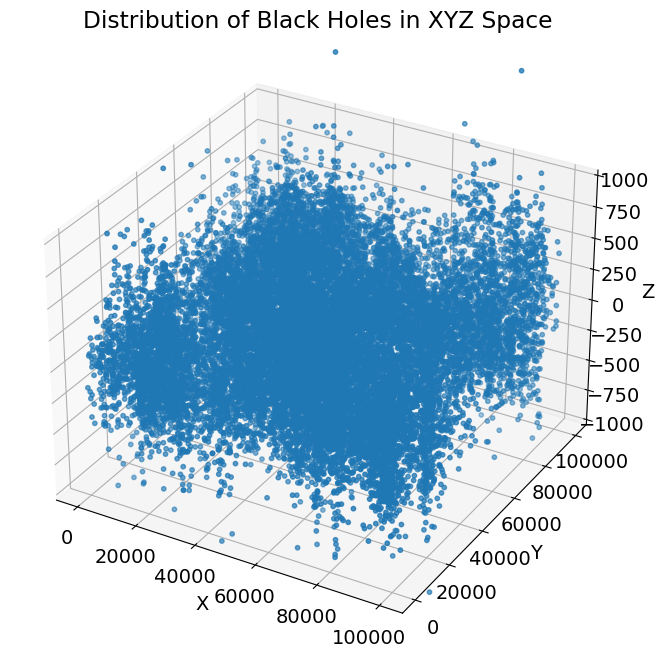

In [87]:
import matplotlib.pyplot as plt

# Get the arrays for the first file
file_path = file_paths[0]
arrays = file_arrays[file_path]

# Extract the x, y, z coordinates
x_coordinates = arrays['x_coordinates']
y_coordinates = arrays['y_coordinates']
z_coordinates = arrays['z_coordinates']

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_coordinates, y_coordinates, z_coordinates, s=10)  # Decrease marker size

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Distribution of Black Holes in XYZ Space')

# Set z-axis limits
ax.set_zlim(-1000, 1000)  # Adjust the z-axis limits according to your desired range

# Show the plot
plt.show()

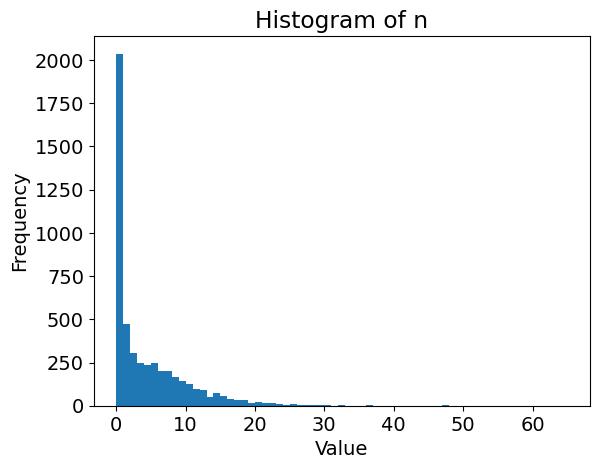

In [88]:
# Determine the range of x, y, and z coordinates
x_range = (np.min(x_coordinates), np.max(x_coordinates))
y_range = (np.min(y_coordinates), np.max(y_coordinates))
z_range = (np.min(z_coordinates), np.max(z_coordinates))

# Define the pixel size
pixel_size = 2000

# Calculate the number of pixels in each axis based on the desired pixel size
num_pixels_x = int((x_range[1] - x_range[0]) / pixel_size) + 1
num_pixels_y = int((y_range[1] - y_range[0]) / pixel_size) + 1
num_pixels_z = int((z_range[1] - z_range[0]) / pixel_size) + 1

# Create empty arrays to store the pixel indices and the number of black holes in each pixel
pixel_indices_x = np.zeros_like(x_coordinates, dtype=int)
pixel_indices_y = np.zeros_like(y_coordinates, dtype=int)
pixel_indices_z = np.zeros_like(z_coordinates, dtype=int)
pixel_counts = np.zeros((num_pixels_x, num_pixels_y, num_pixels_z), dtype=int)

# Iterate over the black hole coordinates and determine the corresponding pixel indices
for i in range(len(x_coordinates)):
    pixel_index_x = int((x_coordinates[i] - x_range[0]) / pixel_size)
    pixel_index_y = int((y_coordinates[i] - y_range[0]) / pixel_size)
    pixel_index_z = int((z_coordinates[i] - z_range[0]) / pixel_size)
    
    # Increment the pixel value for each black hole
    pixel_counts[pixel_index_x, pixel_index_y, pixel_index_z] += 1

# Calculate the number of black holes in each pixel
n = pixel_counts

import matplotlib.pyplot as plt

# Your code to calculate the histogram values (n) goes here

# Specify the range of integer bins
bins = range(int(n.min()), int(n.max()) + 2)

# Create the histogram
plt.hist(n.flatten(), bins=bins)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of n')

# Display the histogram
plt.show()

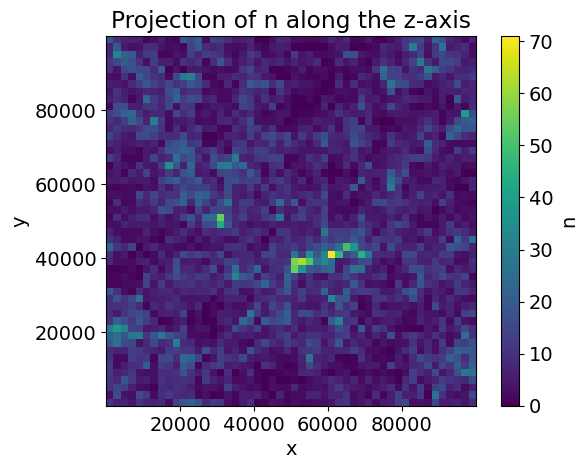

In [89]:
import matplotlib.pyplot as plt

# Create the projection along the z-axis
projection = n.sum(axis=2)

# Create the color plot
plt.imshow(projection, cmap='viridis', origin='lower', extent=[x_range[0], x_range[1], y_range[0], y_range[1]])
plt.colorbar(label='n')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Projection of n along the z-axis')
plt.show()

In [90]:
import numpy as np

file_paths = ['/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_034.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_029.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_026.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_024.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_020.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_019.txt',
              '/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/bhprops_018.txt']

n_arrays = []

for file_path in file_paths:
    # Load the data from the file
    data = np.loadtxt(file_path)
    
    # Extract the x, y, and z coordinates
    x_coordinates = data[:, 2]
    y_coordinates = data[:, 3]
    z_coordinates = data[:, 4]
    
    # Define the number of pixels in each dimension
    num_pixels_x = 50
    num_pixels_y = 50
    num_pixels_z = 2
    
    # Calculate the pixel size in each dimension
    x_range = (0, 100000) #(np.min(x_coordinates), np.max(x_coordinates))
    y_range = (0, 100000) #(np.min(y_coordinates), np.max(y_coordinates))
    z_range = (-1444, 2080) #(np.min(z_coordinates), np.max(z_coordinates))
    
    pixel_size_x = (x_range[1] - x_range[0]) / num_pixels_x
    pixel_size_y = (y_range[1] - y_range[0]) / num_pixels_y
    pixel_size_z = (z_range[1] - z_range[0]) / num_pixels_z
    
    # Calculate the pixel indices for each coordinate
    pixel_indices_x = ((x_coordinates - x_range[0]) / pixel_size_x).astype(int)
    pixel_indices_y = ((y_coordinates - y_range[0]) / pixel_size_y).astype(int)
    pixel_indices_z = ((z_coordinates - z_range[0]) / pixel_size_z).astype(int)
    
    # Create an empty n(x, y, z) array
    n_array = np.zeros((num_pixels_x, num_pixels_y, num_pixels_z))
    
    # Count the number of particles in each pixel
    for i in range(len(x_coordinates)):
        n_array[pixel_indices_x[i], pixel_indices_y[i], pixel_indices_z[i]] += 1
    
    n_arrays.append(n_array)

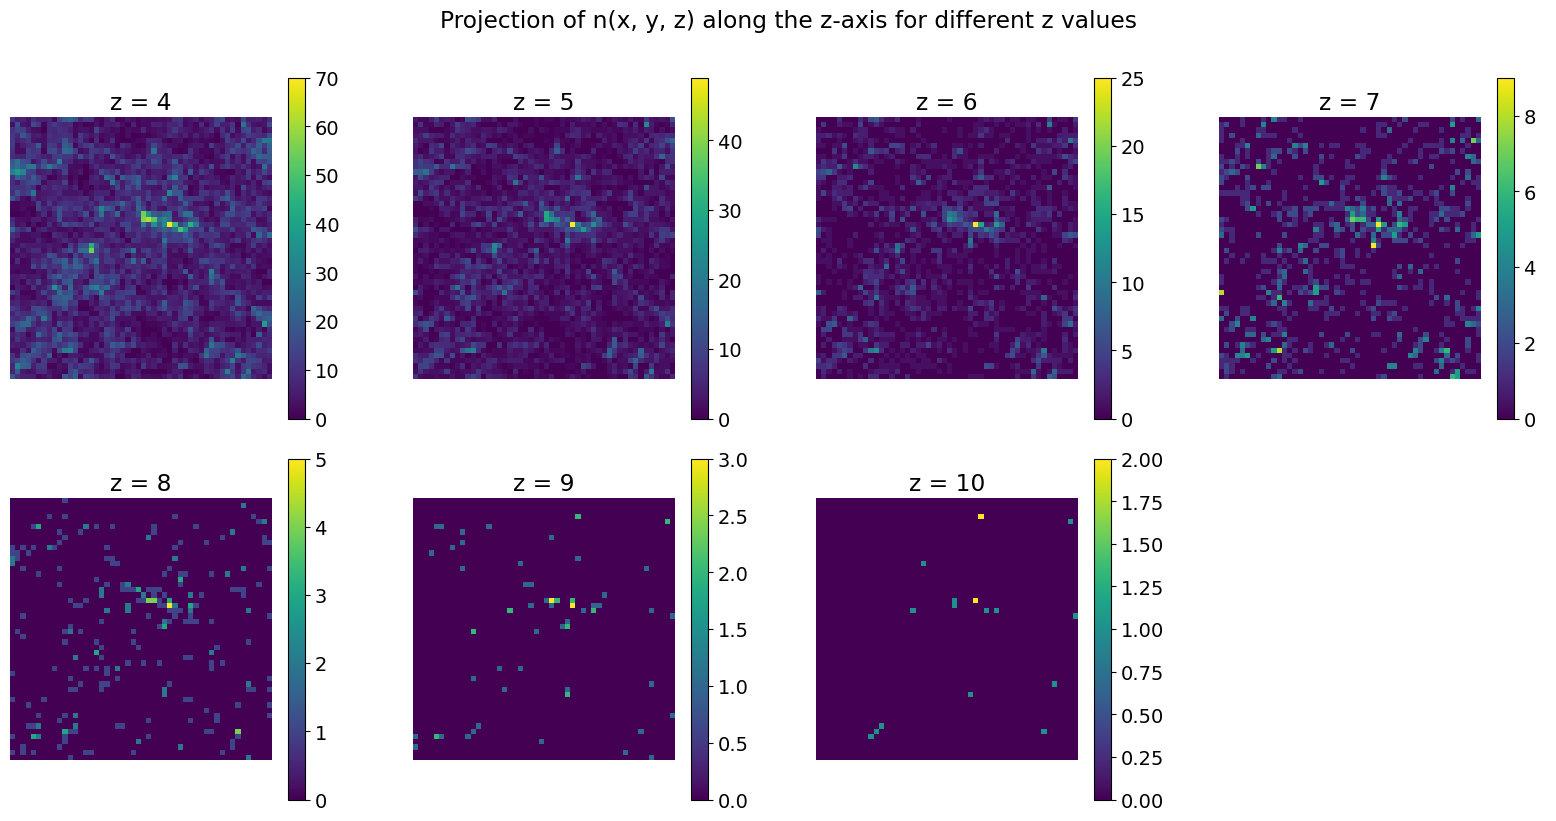

In [91]:
import matplotlib.pyplot as plt     

# Define the number of rows and columns for the subplots
n_rows = 2
n_cols = 4

# Create the figure and subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, 8))

# # Variable to hold the last image object
# im = None

# Iterate through the arrays and create color plots
for i, arr in enumerate(n_arrays):
    # Project the array along axis 2
    projected_arr = arr.sum(axis=2)
    
    # Determine the row and column index for the subplot
    row_idx = i // n_cols
    col_idx = i % n_cols
    
    # Plot the color plot in the corresponding subplot
    im = axs[row_idx, col_idx].imshow(projected_arr, cmap='viridis')
    axs[row_idx, col_idx].set_title(f'z = {i+4}')
    axs[row_idx, col_idx].axis('off')

    # Create a colorbar for the current subplot
    fig.colorbar(im, ax=axs[row_idx, col_idx])

# Adjust the spacing between subplots
plt.tight_layout()
plt.suptitle('Projection of n(x, y, z) along the z-axis for different z values', y=1.05)

# # Add a colorbar using the last image object
# fig.colorbar(im, ax=axs.ravel().tolist())

axs[1, 3].set_axis_off()

# Show the plot
plt.show()

In [99]:
import numpy as np

# Create a list to store the new arrays
nz_arrays = []

# Iterate over each array in n_arrays
for arr in n_arrays:
    # Take the sum along axis 3
    sum_arr = np.sum(arr, axis=2)
    # Append the sum array to the list
    nz_arrays.append(sum_arr)

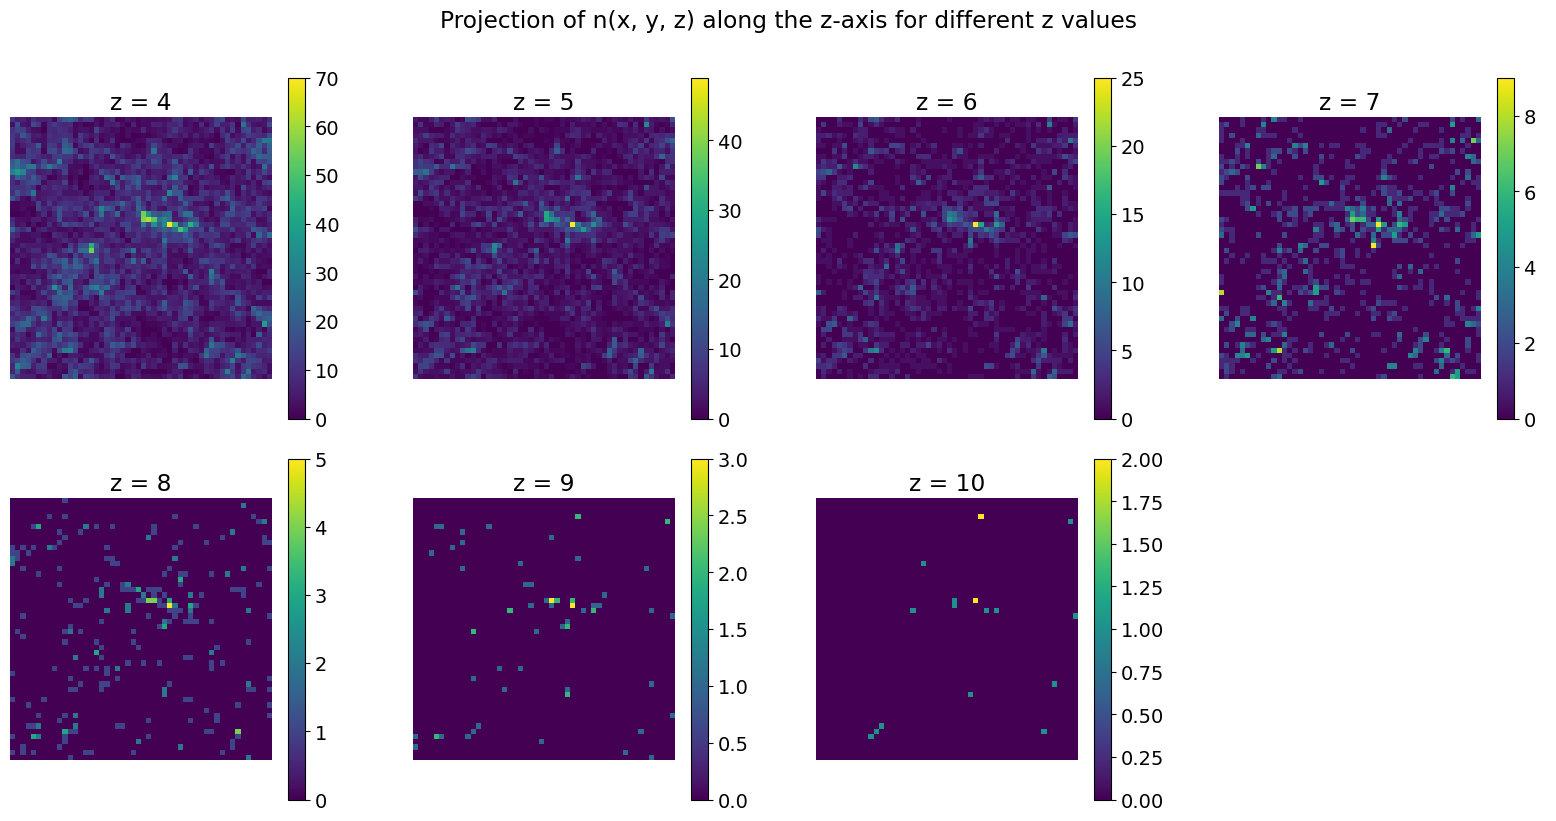

In [100]:
import matplotlib.pyplot as plt     

# Define the number of rows and columns for the subplots
n_rows = 2
n_cols = 4

# Create the figure and subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, 8))

# # Variable to hold the last image object
# im = None

# Iterate through the arrays and create color plots
for i, arr in enumerate(nz_arrays):
    # Project the array along axis 2
    projected_arr = arr
    
    # Determine the row and column index for the subplot
    row_idx = i // n_cols
    col_idx = i % n_cols
    
    # Plot the color plot in the corresponding subplot
    im = axs[row_idx, col_idx].imshow(projected_arr, cmap='viridis')
    axs[row_idx, col_idx].set_title(f'z = {i+4}')
    axs[row_idx, col_idx].axis('off')

    # Create a colorbar for the current subplot
    fig.colorbar(im, ax=axs[row_idx, col_idx])

# Adjust the spacing between subplots
plt.tight_layout()
plt.suptitle('Projection of n(x, y, z) along the z-axis for different z values', y=1.05)

# # Add a colorbar using the last image object
# fig.colorbar(im, ax=axs.ravel().tolist())

axs[1, 3].set_axis_off()

# Show the plot
plt.show()

In [112]:
# nz_array has slices of n(x, y, z) at z ~ 4 to 10
# min_z and max_z has minimum and maximum extend of z axis of each slice
# Now I want to introduce a new axis for z in order to extrapolate the data to z = 4 to 10
# Let's call it the new_z_axis, it need to be in h^-1 Kpc.
# We can easily find the corresponding comoving distance of the redshifts 4 to 10. 

from astropy.cosmology import FlatLambdaCDM

# Define the cosmology
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

# Define the reduced Hubble constant
h = 0.7

# Define the redshifts
redshifts = [4, 5, 6, 7, 8, 9, 10]

# Calculate the comoving distances
new_z_axis = cosmo.comoving_distance(redshifts).value /h  # Convert to h^-1 Mpc

print(new_z_axis)

# Now we need to interpolate the data from the slices to the new z axis
import numpy as np
from scipy.interpolate import interp1d

f = interp1d(new_z_axis, nz_arrays, axis=0)

[10243.38059209 11107.67213638 11781.31432606 12325.14617603
 12776.00740964 13157.63131888 13486.07089486]


[10243.38059209 10704.6030531  11107.67213638 11463.77185054
 11781.31432606 12066.75699816 12325.14617603 12560.48798223
 12776.00740964 12974.33305049 13157.63131888 13327.70564192
 13486.07089486]


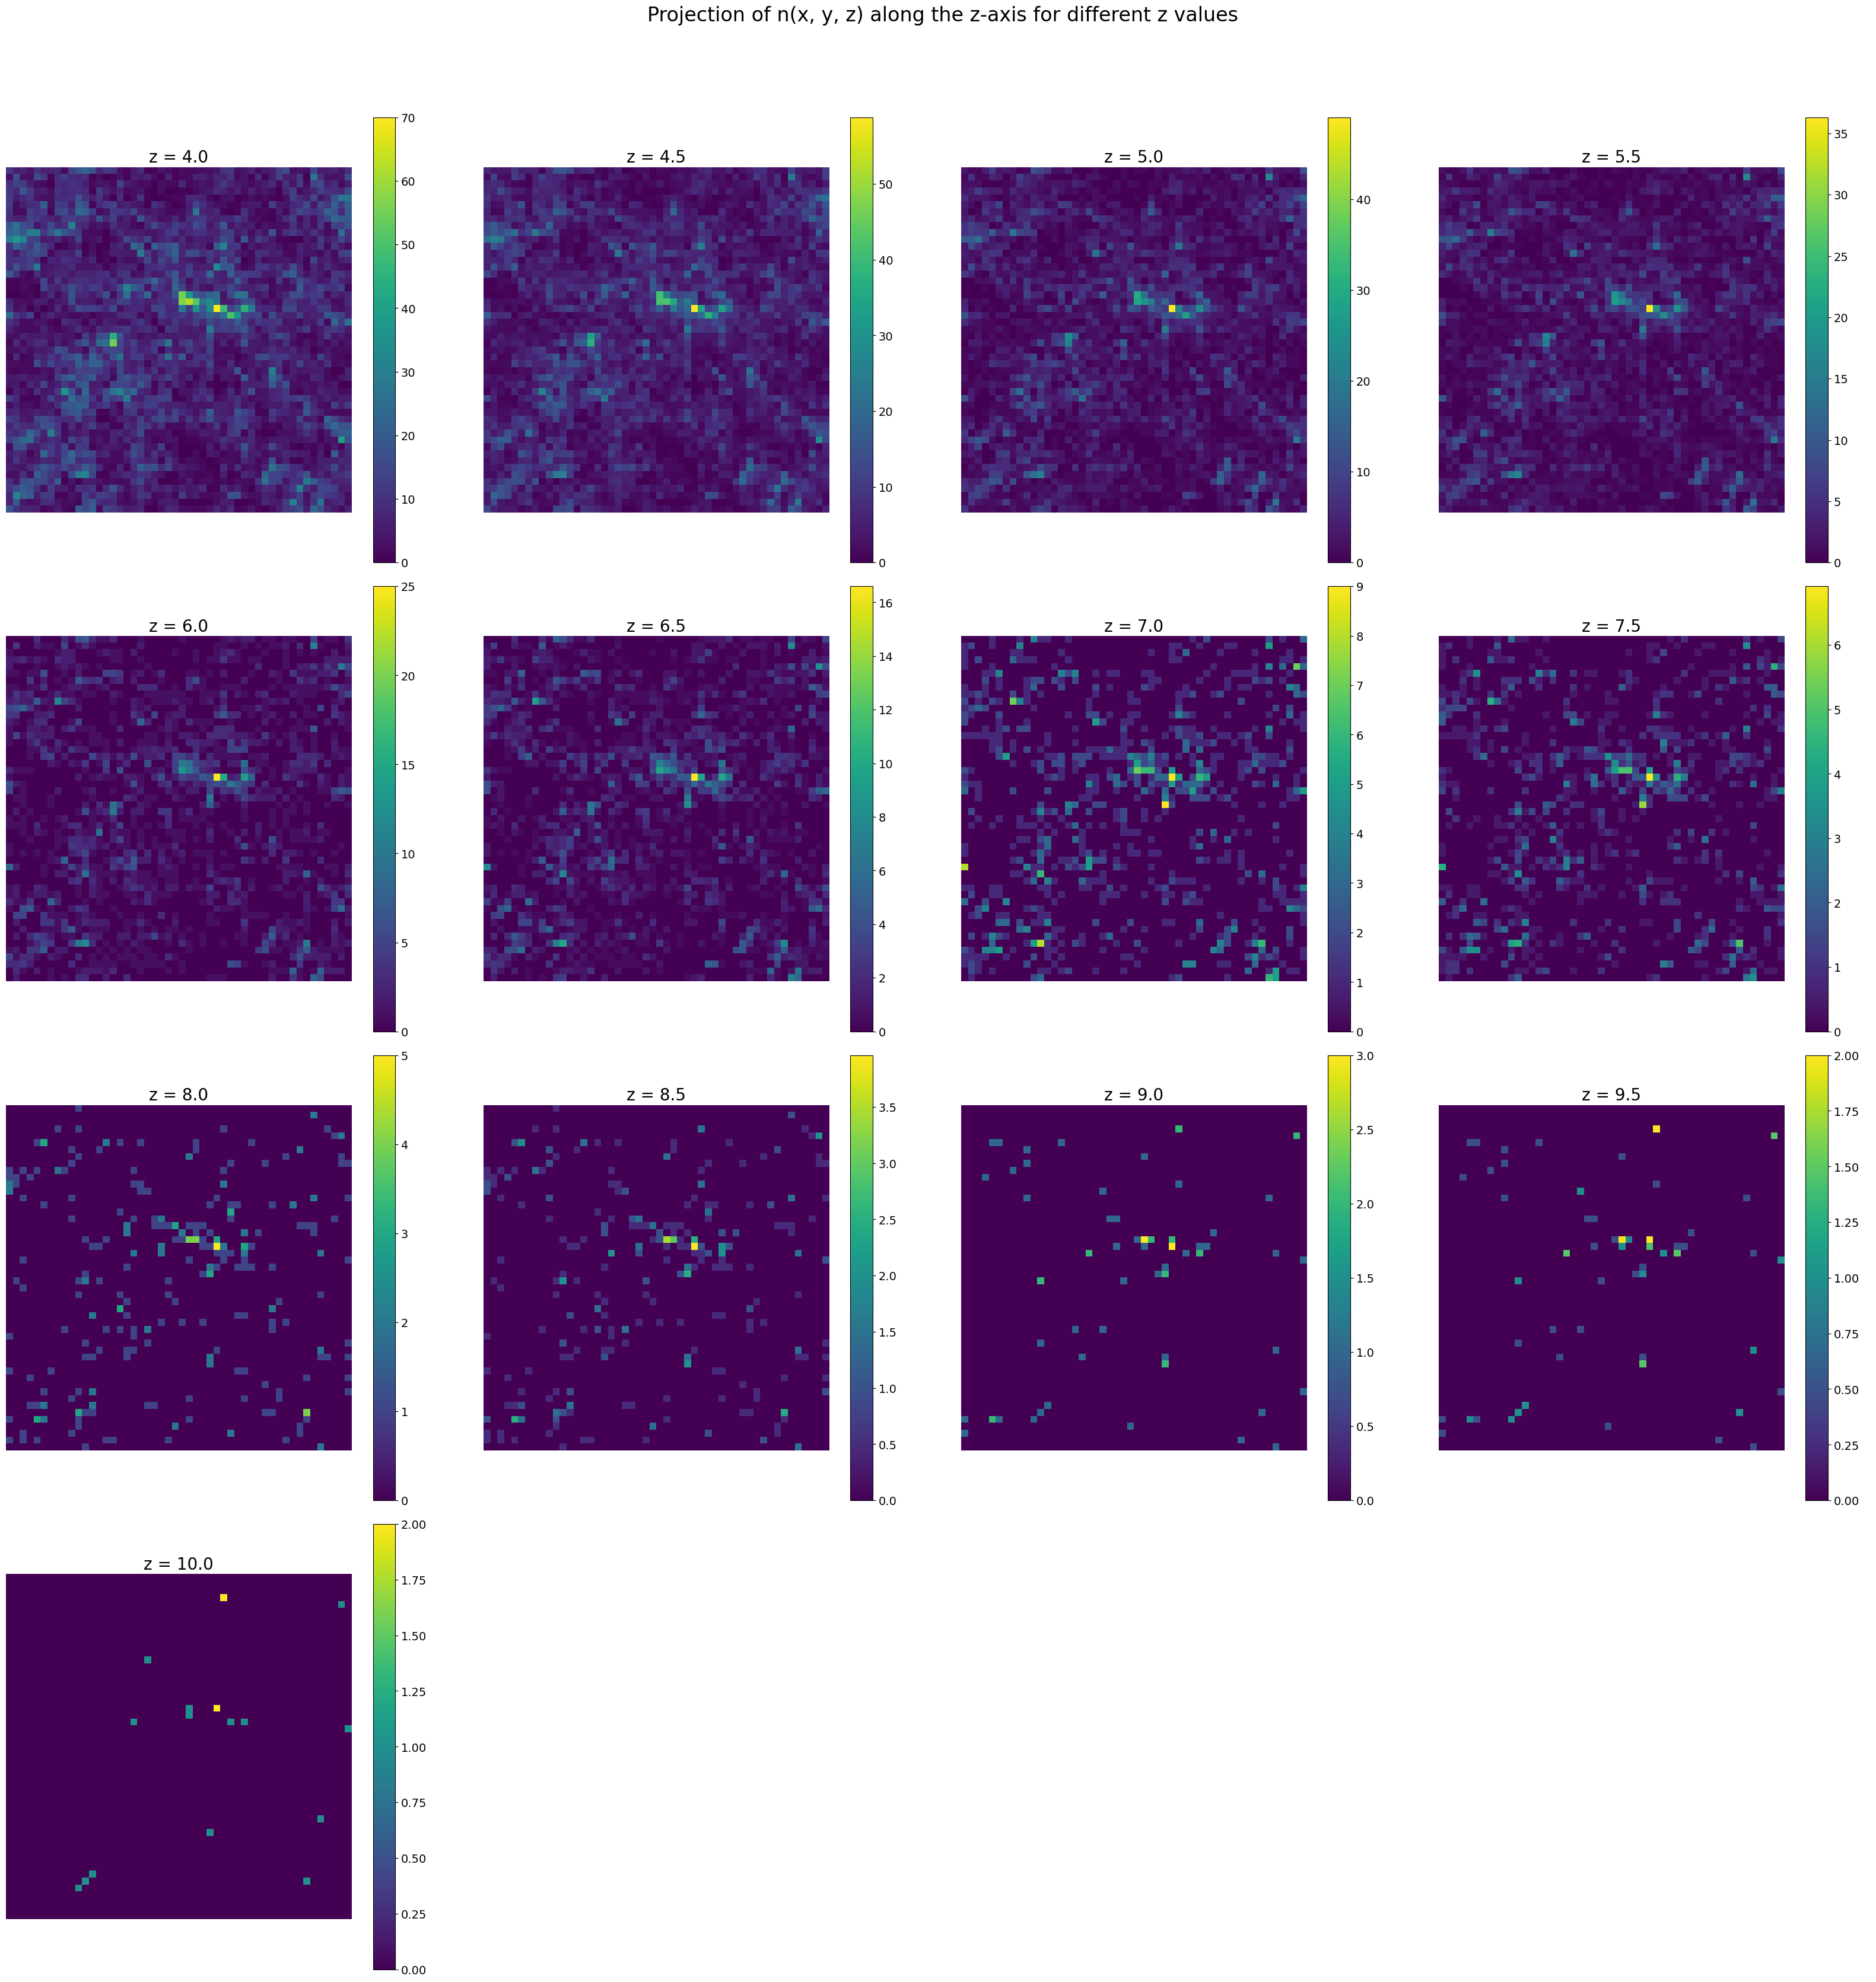

In [122]:
import numpy as np
from astropy.cosmology import FlatLambdaCDM

# Deine the x array
x = np.array([4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.5, 9, 9.5, 10])

# Define the cosmology
H0 = 70.0  # Hubble constant in km/s/Mpc
Om0 = 0.3  # Matter density parameter
cosmo = FlatLambdaCDM(H0=H0, Om0=Om0)

# Convert x array to comoving distance in h^{-1}Mpc
x_comoving = cosmo.comoving_distance(x).value / h

# Print the converted array
print(x_comoving)

# Calculate the corresponding nz array using the function 'f'
nz = f(x_comoving)

# Create a figure with 2 rows and 4 column subplots
fig, axs = plt.subplots(4, 4, figsize=(32, 32))

# Iterate through the arrays and create color plots
for i, arr in enumerate(nz):
    # Project the array along axis 2
    projected_arr = arr
    
    # Determine the row and column index for the subplot
    row_idx = i // n_cols
    col_idx = i % n_cols
    
    # Plot the color plot in the corresponding subplot
    im = axs[row_idx, col_idx].imshow(projected_arr, cmap='viridis')
    axs[row_idx, col_idx].set_title(f'z = {x[i]}', fontsize=20)
    axs[row_idx, col_idx].axis('off')

    # Create a colorbar for the current subplot
    fig.colorbar(im, ax=axs[row_idx, col_idx])

# Adjust the spacing between subplots
plt.tight_layout()
plt.suptitle('Projection of n(x, y, z) along the z-axis for different z values', y=1.05, fontsize=24)

# # Add a colorbar using the last image object
# fig.colorbar(im, ax=axs.ravel().tolist())

axs[3, 1].set_axis_off()
axs[3, 2].set_axis_off()
axs[3, 3].set_axis_off()

# Show the figure
plt.show()